# Introduction to Python - Matplotlib/Scipy
## Problem Set - Suggested Solutions

In [1]:
# Authors: Matthias Huber (huber@ifo.de), Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-05-17 14:55:05.693369


## Exercise 1
(a) Draw the function $y=log(x)$ on the interval from 1 to 10

(b) Draw the function $y=x^3$ on the interval from -10 to 10. Compile the plot once with N=5 and with N=100 individual values for the x-axis, both in the same figure. Set two different colors for the to lines.


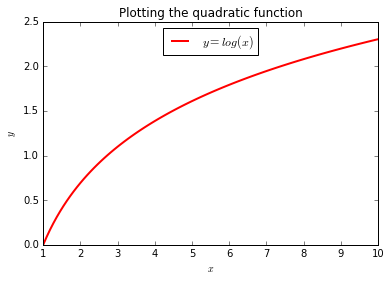

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## (a) N=5
x = np.linspace(1,10,100)
y = np.log(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label = '$y = log(x)$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

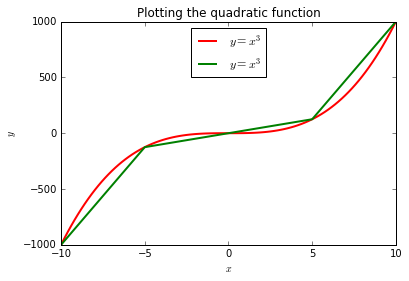

In [3]:
## (b) N=100
x100 = np.linspace(-10,10,100)
y100 = x100**3
x5 = np.linspace(-10,10,5)
y5 = x5**3

fig, ax = plt.subplots()
ax.plot(x100, y100, 'r-', linewidth=2, label = '$y = x^3$')
ax.plot(x5, y5, 'g-', linewidth=2, label = '$y = x^3$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

## Exercise 2
Consider the utility function $U(B,C)=B^{\alpha} C^{(1-\alpha)}$ of a Oktoberfest visitor consuming beer (B) and chicken (C).

(a) Write a function that returns the utilily depending on the amount of consumed chicken and beers

(b) Plot the utility as a function of the amount of beer with $\alpha=0.7$ and $C=2$. The range of beers should be from 0 to 10.

(C) Plot the isoquants of the same utility for all combination of C and B in the range from 0 to 10.

(d) Consider now the prices of $p_B=10 €$ and $p_C=10€$ and a budget of 55€. Draw the budgetline in the graph from question (c) and guess what the optimal consumption might be. You can set the limits of the x and the y axis by **ax.set_xlim([xlim,xmax])** and **ax.set_ylim([ylim,ymax])**.

In [4]:
## (a)
def utility(C,B,alpha):
    return (C**alpha)*(B**(1-alpha))

print (utility(3,4,0.5))

3.4641016151377544


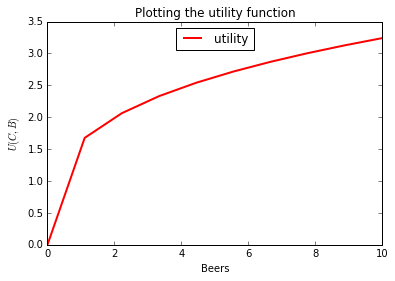

In [5]:
## (b)
B = np.linspace(0,10,10)
u = utility(2, B, 0.7)
fig, ax = plt.subplots()
ax.plot(B, u, 'r-', linewidth=2, label = 'utility')
ax.set_title('Plotting the utility function')
ax.set_xlabel('Beers')
ax.set_ylabel('$U(C,B)$')
ax.legend(loc = 'upper center')

(0, 10)

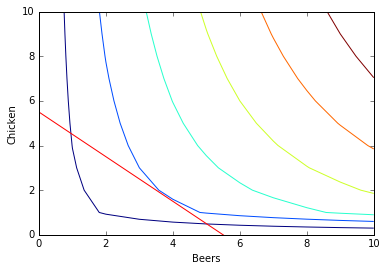

In [6]:
## (c)
N = 11
## interpolate both production factors over equidistant grid
C = np.linspace(0, 10, N)
B = np.linspace(0, 10, N)
## use meshgrid function 
X, Y = np.meshgrid(C, B)
U = utility(X, Y, 0.7)

## plot contour
fig, ax = plt.subplots()
ax.contour(C, B, U)
ax.set_xlabel('Beers')
ax.set_ylabel('Chicken')

## (d)
## Budget constraint
def chicken(B):
    return (5.5-B)

ax.plot(B,chicken(B),'r')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

## Exercise 3

The file *Capacities.csv* contains country-level data on electricity generation capacity, and more specifically on capacity of "clean" (i.e. non-carbon emitting) technologies. It consists of three columns: the first columns contains the combined capacity for hydro and nuclear power plants, while the second columns contains the combined capacity for wind and solar installations (all in TW). The third columns contains the overall *capacity factor*, that is, the share of potential electricity that is actually produced. In other words, a capacity factor of 50% would imply that the a plant runs half of the time. In this question, we are interested in how the capacity factor depends on how wind and solar capacity are in the system.

(a) Each column consists of 600 *country-year* observations (30 OECD countries over 20 years). Use Numpy's **loadtxt** function to load the data as a 600-by-3 array. (A side note: there are better ways to work with this kind of data in Python than a Numpy array, as we will see in next lecture).

(b) Visualize the data using a scatter plot, where each axis corresponds to a capacity measure, while the color (or the size) of the markers is determined by the level of the capacity factor.

(c) If you are not interested in absolute capacity levels, an alternative is to plot the capacity factor against the *relative* capacity of wind and solar, i.e. their share in total renewable capacity. Use Matplotlib's **plot** method, but with markers instead of lines. Also, include only those observations that have a wind & solar share of more than 1 percent (Hint: use a logical Nunpy array).

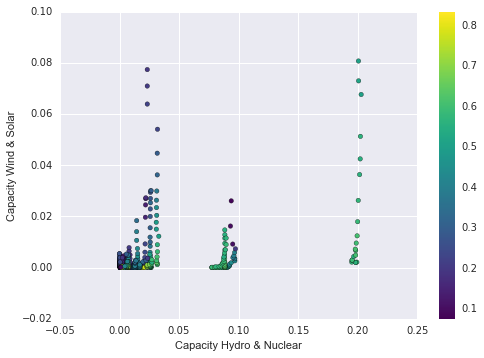

In [7]:
import seaborn

## (a)
X = np.loadtxt('Capacities.csv')

cap_rn1 = X[:,0]
cap_rn2 = X[:,1]
cf_rn = X[:,2]

## (b)

fig, ax = plt.subplots()
im = ax.scatter(cap_rn1, cap_rn2, c = cf_rn, cmap='viridis')
fig.colorbar(im);  # show color scale
ax.set_xlabel('Capacity Hydro & Nuclear')
ax.set_ylabel('Capacity Wind & Solar')

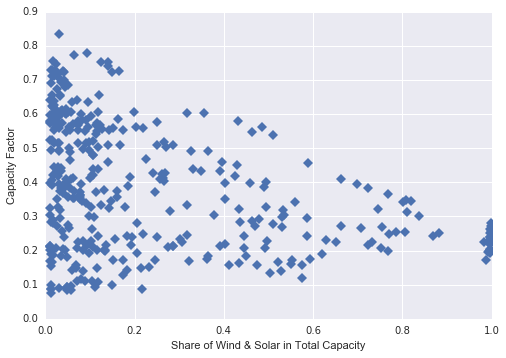

In [8]:
## (c)

## get relative capacity of wind + solar
sh_ws = (cap_rn2 / (cap_rn1 + cap_rn2))

fig, ax = plt.subplots()
## Use logical arrays to exclude observations where sh_ws < 0.01
ax.plot(sh_ws[sh_ws >= 0.01], cf_rn[sh_ws >= 0.01], 'D')
ax.set_xlabel('Share of Wind & Solar in Total Capacity')
ax.set_ylabel('Capacity Factor')

## Exercise 4

In this exercise, we will conduct some analysis on the market value of football players in the German Bundesliga, using the same data set as in the lecture (run the cell below to get a description of what the individual columns of the data set contain). 

(a) Load the data using Numpy **loadtxt** function. Restrict the data to information on market value, age, goals, shots per game and the position code of players. 

(b) First, we want to analyze what type of players (strikers, defenders, midfielders) score and attempt to score goals . Draw a scatter plot that has goals on the x-axis and shots per game on the y-axis; the "bubbles" should be colored according to the position code of a player, while their size should reflect the value of the players. Play around with scaling the size until you get a nice plot.

(b) Draw a histogram of both the age and the values of the players. Are they both normally distributed?

(c) Set up a regression model where the value of players is explained by the number of goals only. Compute $\beta_0$ and $\beta_1$ and use them to calculate the coefficient of determination $R^2$.

(d) Run the same model again but with strikers only (position code = 2) and check whether the marginal effect of goals ($\beta_1$) and the significance of the model ($R^2$) increase in this case (as we would expect).

In [9]:
## load the description of the data
fh = open("BundesligaData.txt")
data = fh.readlines()
fh.close
lines = data[0].split(';')
description = []
for i in range(len(lines)):
    description.append((i,lines[i]))
print(description)

[(0, 'name'), (1, 'position'), (2, 'value'), (3, 'valuemax'), (4, 'age'), (5, 'goals'), (6, 'assists'), (7, 'yellow'), (8, 'red'), (9, 'shotspergame'), (10, 'passsuccess'), (11, 'aerialswon'), (12, 'rating'), (13, 'positioncode'), (14, '\n')]


In [10]:
## (a): load the relevant data from txt-file

import numpy as np
cols = (2,9,5,13) # columns that contain the data on market value, age, goals, shots per game and posision
bundesliga = np.loadtxt('BundesligaData.txt', delimiter=';', usecols = (cols), skiprows=1)

attributes = []
k = 0
for i in cols:
    attributes.append((k, description[i][1]))
    k += 1
print(attributes)

[(0, 'value'), (1, 'shotspergame'), (2, 'goals'), (3, 'positioncode')]


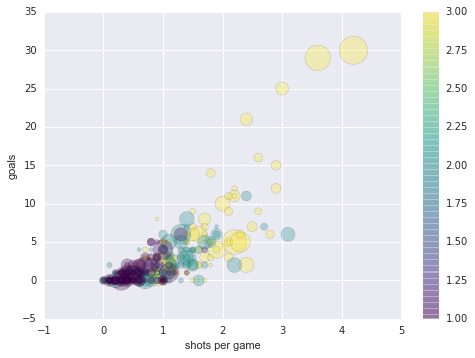

In [11]:
## (b): draw scatter plot
fig, ax = plt.subplots()
im = ax.scatter(bundesliga[:,1], bundesliga[:,2], s = bundesliga[:,0]*10, c = bundesliga[:,3], alpha=0.3, cmap='viridis')
ax.set_xlabel("shots per game")
ax.set_ylabel("goals")
fig.colorbar(im)

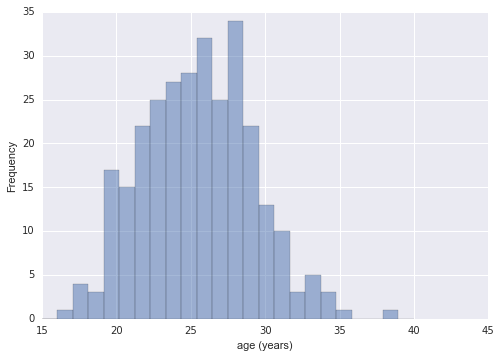

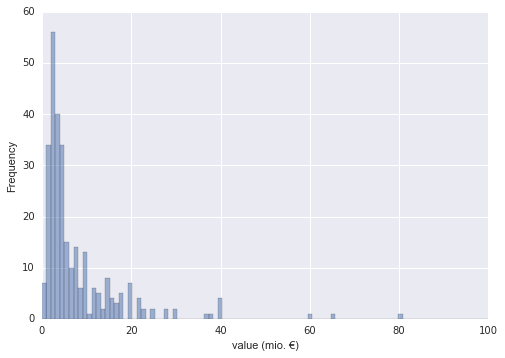

In [12]:
## (c) : Histograms
## load the relevant data from txt-file
cols=(2,4) # columns that contain the data on value and age
bundesliga = np.loadtxt('BundesligaData.txt', delimiter=';', usecols=(cols), skiprows=1)

fig, ax = plt.subplots()
## Histogram for sample
ax.hist(bundesliga[:,1], bins=np.linspace(15,40,25), alpha=0.5)
ax.set_xlabel("age (years)")
ax.set_ylabel("Frequency")

fig, ax = plt.subplots()
## Histogram for sample
ax.hist(bundesliga[:,0], bins=np.linspace(0,100,100), alpha=0.5)
ax.set_xlabel("value (mio. €)")
ax.set_ylabel("Frequency")

In [13]:
##(c) OLS: market value on goals

from scipy import linalg
## load the relevant data from txt-file
cols = (2,5,13)
bundesliga = np.loadtxt('BundesligaData.txt',delimiter=';', usecols=(cols),skiprows=1)

## get attributes (for presenting results)
attributes = []
k = 0
for i in cols:
    attributes.append((k, description[i][1]))
    k += 1

## define regression matrix
X = np.ones((len(bundesliga[:,1]),2))
X[:,1] = bundesliga[:,1]
y = bundesliga[:,0]

## run OLS
beta = linalg.inv((X.transpose() @ X)) @ X.transpose() @ y
for i in range(len(beta)):
    print(attributes[i][1],beta[i])    

## compute R^2    
beta.shape = (1,2)
y_predict = beta @ X.transpose()
residual = y - y_predict
ssq = np.sum(residual**2)
sst = np.sum((y-y.mean())**2)
Rsq = 1-ssq/sst
print('R^2', Rsq)     

value 5.40093687943
goals 1.03675048179
R^2 0.181747620066


In [14]:
## (d) OLS with strikers only

## limit data to strikers
strikers = bundesliga[bundesliga[:,2] == 3]

## define regression matrix
X = np.ones((len(strikers[:,1]),2))
X[:,1] = strikers[:,1]
y = strikers[:,0]

## run OLS
betastrikers = linalg.inv((X.transpose() @ X)) @ X.transpose() @ y
for i in range(len(betastrikers)):
    print(attributes[i][1],betastrikers[i])

## compute R^2      
betastrikers.shape = (1,2)
y_predict = betastrikers @ X.transpose()
residual = y - y_predict
ssq = np.sum(residual**2)
sst = np.sum((y-y.mean())**2)
Rsq = 1-ssq/sst
print('R^2', Rsq)  

value 2.13434344078
goals 1.28549614914
R^2 0.336012126151


## Exercise 5

(a) Write two functions **demand** and **supply** that both take three arguments, quantity **x** and two function-specific parameters, and capture inverse demand and supply:
\begin{align}
    p^d &= a - b x \\
    p^s &= c + d x
\end{align}

(b) Use a root-finding algorithm to solve for the market-clearing price $p^*$. It may be helpful to define a third function, **excess_demand**, that makes use of the two functions above. Find $p^*$ for $a = 5$, $b = 0.4$, $c = 0$ and $d = 0.3$. 

(c) Import **matplotlib.pyplot** and **seaborn**. Use your functions to replicate the following figure, including all the labels. The parameter values used to generate the graph are the same as in question (b). 


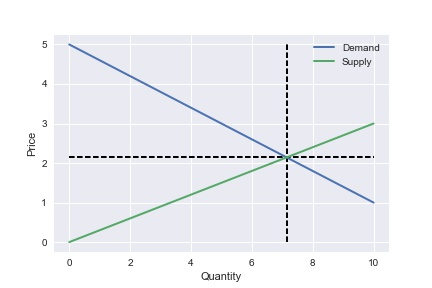

In [15]:
# from IPython.display import Image
# Image('marketprice.jpg')

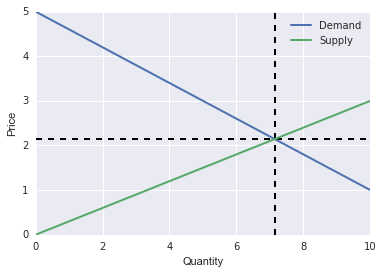

In [16]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## (a)
def demand(x, a, b):
    return a - b * x

def supply(x, c, d):
    return c + d * x

## (b)
def excess_demand(x, a, b, c, d):
    return demand(x, a, b) - supply(x, c, d)

a, b, c, d = 5, 0.4, 0, 0.3

x_mc = scipy.optimize.bisect(excess_demand, 0, 10, args = (a, b, c, d))
p_mc = supply(x_mc, c, d)

## (c)
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, demand(x, 5, 0.4), linewidth= 2, label = 'Demand')
ax.plot(x, supply(x, 0, 0.3), linewidth= 2, label = 'Supply')
ax.vlines(x_mc, 0, 5, color='k', linestyle="--", linewidth= 2)
ax.hlines(p_mc, 0, 10, color='k', linestyle="--", linewidth= 2)
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.legend()

## Exercise 6

In one of the previous problem sets (Week 3 - Strings, question 7), we coded a simple version of the Battleship game. In this question, we use **matplotlib.pyplot** to improve on one dimension of this implementation, the graphical output. If you haven't solved the previous question, feel free to use the code provided in the suggested solutions for that week.

Recall that in our implementation of Battleship, we represented the board (i.e. the ocean) as a list of lists. A tile (i.e., a square of the ocean) was represented by a string, an **"O"** if the tile had not been uncovered yet and an **"X"** if it had been uncovered but without finding the ship. Now, we are going to represent the board as a Numpy array of 0's and 1's, with **0** representing not yet uncovered tiles and **1** representing tiles that have been unsuccessfully checked.

(a) Import **numpy**, **matplotlib.pyplot** and (as before) the **random** module. In addition, run the following import statement: **from IPython import display**.

(b) Modify the **generate_board** function from the previous versions such that it still takes the arguments **x_b** and **y_b**, but returns a *Numpy array* of dimension **x_b**-by-**y_b**, filled with zeros.

(c) Below, we have provided a new version of the **print_board** function. Run the cell below *after you have finished question (b)*. You should get a figure that consists of a blue square.

(d) In the **run_game** function, make the following modifications:

1. Add the lines **fig, ax = plt.subplots()** and **ax.grid()** at the beginning of the function.
2. **print_board** now takes three arguments, instead of one argument as in the previous implementation. Add the arguments **fig** and **ax** to every occurrence of **print_board**.
3. Finally, modify your code so it properly updates tiles on your board from 0 to 1. Hint: In the previous version, the **run_game** function updated tiles from "O" to "X". In addition to replacing "X"s with 1's in your code, there is one small adjustment you have to make - recall that indexing for two-dimensional Numpy arrays works differently than for lists of lists!

(e) Test your implementation for a 5-by-5 board.


In [ ]:
## PROVIDE THIS ONE IN THE QUESTION!

def print_board(board, fig, ax):
    ax.matshow(board, cmap='bwr')
    display.display(fig)

fig, ax = plt.subplots()
ax.grid()    
board = generate_board(5, 5)
print_board(board, fig, ax)


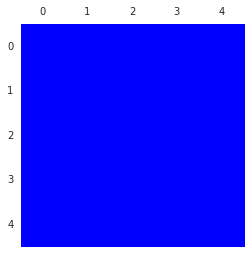

(1, 1)
Current turn: 1
Guess Row:2
Guess Col:1
You missed my battleship!


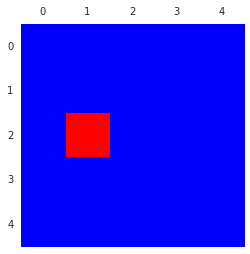

Current turn: 2
Guess Row:3
Guess Col:2
You missed my battleship!


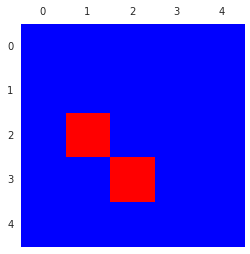

Current turn: 3
Guess Row:1
Guess Col:1
Congratulations! You sunk my battleship! You win!


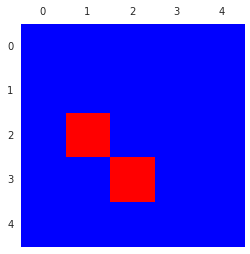

In [17]:
## (a): import packages

import numpy as np
import matplotlib.pyplot as plt

from random import randint
from IPython import display


## (b): generate board
def generate_board(x_b, y_b):
    return np.zeros((x_b, y_b))   


## (d)
def print_board(board, fig, ax):
    ax.matshow(board, cmap='bwr')
    display.display(fig)

def random_pos(x_b, y_b):
    return (randint(0, x_b - 1), randint(0, y_b - 1))

def run_game(x_b, y_b, max_turn):
    
    fig, ax = plt.subplots()
    ax.grid()
    
    board = generate_board(x_b, y_b)
    print_board(board, fig, ax)
    ship_pos = random_pos(x_b, y_b)
    print(ship_pos)
    
    for turn in range(max_turn):
        print('Current turn: {}'.format(turn + 1))
        guess_row = int(input("Guess Row:"))
        guess_col = int(input("Guess Col:"))
    
        if guess_row == ship_pos[0] and guess_col == ship_pos[1]:
            print("Congratulations! You sunk my battleship! You win!")
            break
        else:
            if (guess_row < 0 or guess_row > x_b - 1) or (guess_col < 0 or guess_col > y_b - 1):
                print("Oops, that's not even in the ocean.")
            elif(board[guess_row, guess_col] == 1):
                print("You guessed that one already.")
            else:
                print("You missed my battleship!")
                board[guess_row, guess_col] = 1
            
            print_board(board, fig, ax)
            if turn + 1 == 3:
                print("Game Over")


## (e)
x_b, y_b = 5, 5
max_turn = 3
run_game(x_b, y_b, max_turn)

## Exercise 7 (ADVANCED)

Consider a two-period "cake-eating problem": a social planner needs to decide how to distribute the use of an exhaustible resource over two periods. As an example, you could think of a given, finite stock of oil, but also of a (binding) limit on greenhouse gas emissions.

The resource is used as an input in a Cobb-Douglas production function, together with capital. Production in period $t$ is given by
\begin{equation*}
	F(K_t, E_t) = K_t^\alpha E_t^{1 - \alpha},\ \ t = 1,2,
\end{equation*}
where $E_t$ denotes the amount of the resource used in period $t$. We have the following constraint:
\begin{equation*}
E_1 + E_2 = R
\end{equation*}
where $R$ is the stock of the finite resource. 

Other than that, this is a standard neoclassical growth model. The planner maximizes lifetime (here two periods) utility of a representative household, with per-period utility as a function of consumption $C_t$:
\begin{equation*}
    \max u(C_1) + \beta u(C_2)
\end{equation*}
As a functional form for $u$, assume a *constant intertemporal elasticity of substitution*:
\begin{equation*}
    u(C) = \frac{C^{1 - \nu}}{1 - \nu}
\end{equation*}

The planner's constraints are given by
\begin{align*}
	C_1 + K_2 &= K_1^{\alpha} E_1^{1-\alpha} + (1 - \delta) K_1 \\ 
	C_2 &= K_2^{\alpha} E_2^{1-\alpha} + (1 - \delta) K_2 \\ 
    E_1 + E_2 &= R
\end{align*}
where $\delta$ denotes the depreciation rate and the initial capital stock $K_1$ is given.


Aside: with log utility ($u(C) = \log(C)$) and full depreciation ($\delta = 1$), it would be straightforward to solve this model analytically.


(a) Define functions **u** and **F** that implement the utility and the production function given above. In addition, write a function that captures the objective function $u(C_1) + \beta u(C_2)$.

(b) Use Scipy's minimization routine (**scipy.optimize.minimize**) to solve the model for the set of parameter values given below. 



In [18]:
## Model parameters
alpha = 0.6
beta = 0.98
R = 1
K1 = 1
nu = 2
delta = 0.9

In [19]:
import scipy.optimize

## (a) define functions
def u(x, nu):
    """
    Utility function
    """
    return (1 - nu)**(-1) * x**(1-nu)
    
def F(k, e, alpha):
    """
    Production function: Cobb-Douglas
    """
    return k**(alpha) * e**(1-alpha)

def obj(x, alpha, beta, delta, nu, K1):
    """
    Computes the social planner's objective function, i.e. the representative agent's lifetime utility
    """
    E1, K2 = x
    
    I = K2 - (1 - delta) * K1
    return - u(F(K1, E1, alpha) - I, nu) \
            - beta * u( F( K2, R - E1, alpha) + (1 - delta) * K2, nu)


In [20]:
## Closed-form solution (with log utility and full depreciation), for comparison
E1 = R * (1 + alpha * beta)/(1 + alpha * beta + beta)
K2 = alpha * beta * F(K1, E1, alpha) / (1 + alpha * beta)
x0 = [E1, K2]
print("The analytical result (with log-utility and full depreciation) is given by E1 = {:.3} and K2 = {:.3}.".format(E1, K2))


## initial guess for minimization
x0 = [E1, K2 + (1 - delta) * K1]

## determine bounds for choice variables
bnds = [(1e-8, R), (1e-8, 1e+12)]

## Baseline
# run minimization routine
res = scipy.optimize.minimize(obj, x0, args = tuple([alpha, beta, delta, nu, K1]), \
                              bounds = bnds, method='SLSQP', tol = 1e-12)
E1, K2 = res.x
print("The numerical result (with CIES = {} and delta = {}) is given by E1 = {:.3} and K2 = {:.3}.".format(nu**(-1), delta, E1, K2))

The analytical result (with log-utility and full depreciation) is given by E1 = 0.618 and K2 = 0.306.
The numerical result (with CIES = 0.5 and delta = 0.9) is given by E1 = 0.593 and K2 = 0.389.
